In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [16]:
df = pd.read_csv("bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [18]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
y_pred = model.predict(X_test)


In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.901657458563536
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905

[[779  28]
 [ 61  37]]


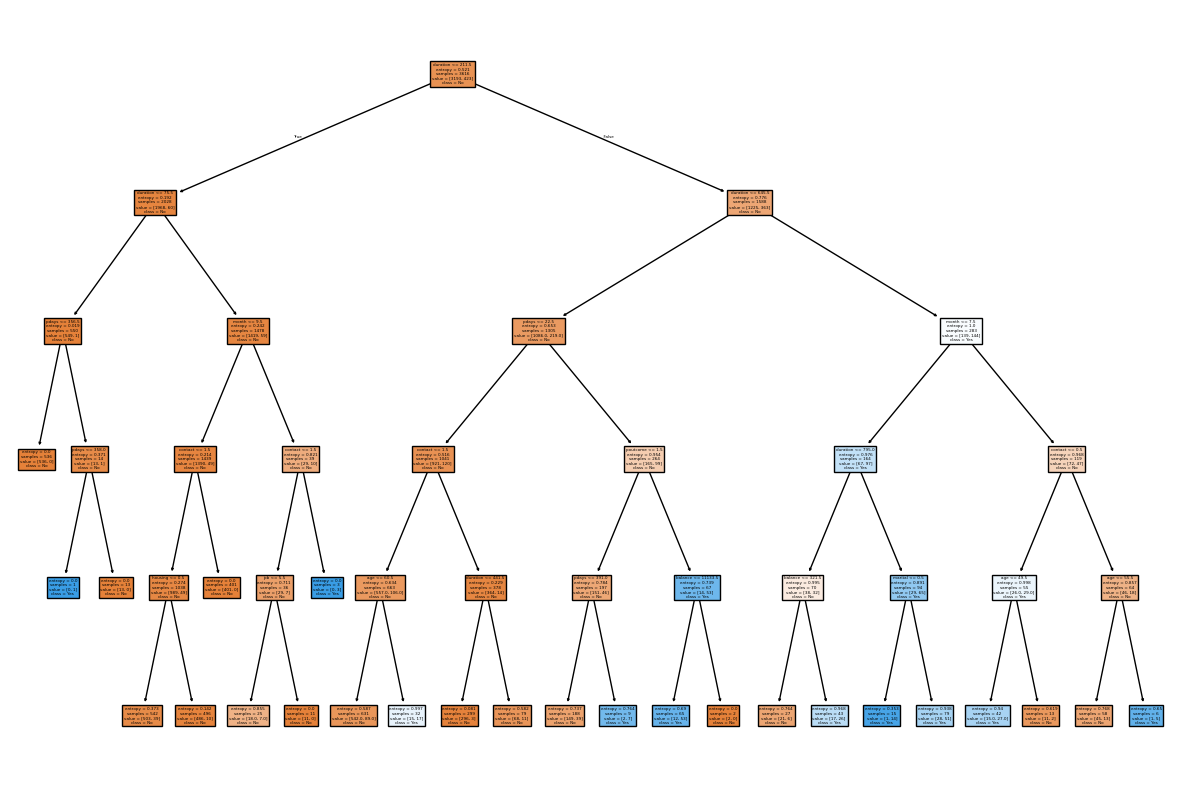

In [22]:
plt.figure(figsize=(15,10))

plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No","Yes"],
    filled=True
)

plt.show()


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
cm = confusion_matrix(y_test, y_pred)


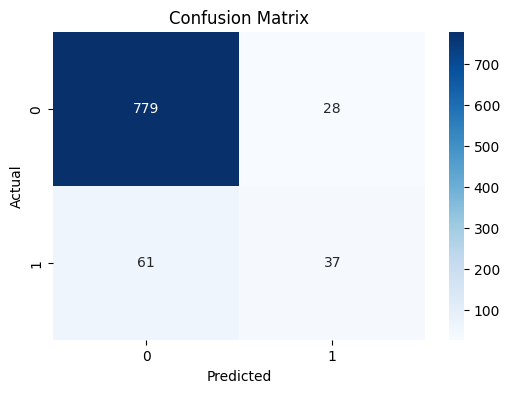

In [25]:
plt.figure(figsize=(6,4))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()
